In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
#for inline plots in jupyter
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

# import seaborn
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [3]:
df = pd.read_csv("nyc-rolling-sales.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [5]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [6]:
df.drop(["Unnamed: 0", "EASE-MENT","APARTMENT NUMBER"], axis=1, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   BUILDING CLASS AT PRESENT       84548 non-null  object 
 7   ADDRESS                         84548 non-null  object 
 8   ZIP CODE                        84548 non-null  int64  
 9   RESIDENTIAL UNITS               84548 non-null  int64  
 10  COMMERCIAL UNITS                84548 non-null  int64  
 11  TOTAL UNITS                     84548 non-null  int64  
 12  LAND SQUARE FEET                

# A. Measure of Central Tendency : Mean

**Question :** Berapa rata-rata harga rumah per-masing-masing borough?

In [8]:
# pre-processing
df_borough = df[["BOROUGH", "SALE PRICE"]]
borough_price = df_borough.groupby(['BOROUGH'], axis=0).mean()
borough_price

,SALE PRICE
BOROUGH,
1,3.337951e+06
2,5.901936e+05
3,8.344884e+05
4,7.399086e+05
5,5.434721e+05


# B. Measure of Central Tendency: Median

**Question :** Berapa nilai tengah dari tahun pembangunan rumah di Manhattan (Broough 1)?

In [9]:
# pre-processing
year_b1 = df.loc[df['BOROUGH']==1, 'YEAR BUILT']
year_b1

0        1900
1        1900
2        1900
3        1913
4        1900
         ... 
18301    1990
18302       0
18303    1969
18304    1967
18305    2005
Name: YEAR BUILT, Length: 18306, dtype: int64

In [10]:
year_b1.median()

1938.0

# C. Measure of Central Tendency: Modus

**Question :** Borough mana yang menjual paling banyak apartemen?

In [11]:
# pre-processing
borough = df['BOROUGH']
borough

0        1
1        1
2        1
3        1
4        1
        ..
84543    5
84544    5
84545    5
84546    5
84547    5
Name: BOROUGH, Length: 84548, dtype: int64

In [12]:
borough.mode()

0    4
dtype: int64

# D. Measure of Spread: Range

**Question :** Berapa range luas tanah apartemen yang terjual pada wilayah Queens (borough = 4)?

In [14]:
# pre-processing
lsf_b4 = df.loc[df['BOROUGH']==1, 'LAND SQUARE FEET']
lsf_queens = lsf_b4.dropna()
lsf_queens

0         1633.0
1         4616.0
2         2212.0
3         2272.0
4         2369.0
          ...   
18300     1450.0
18301     1260.0
18302    13000.0
18303    29775.0
18304    25875.0
Name: LAND SQUARE FEET, Length: 1859, dtype: float64

In [15]:
np.ptp(lsf_queens)

363912.0

# E. Measure of Spread: Variance 

**Question :** Berapa persebaran harga apartemen di new york city?

In [16]:
# pre-processing
price = df["SALE PRICE"].dropna()
price

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64

In [17]:
statistics.variance(price)

130079849507172.66

# F. Measure of Spread: Standard Deviation

**Question :** Tentukan standar deviation dari harga apartemen di Staten Island (borough = 5)!

In [19]:
# pre-processing
price_b5 = df.loc[df['BOROUGH']==1, 'SALE PRICE']
price_staten_island = price_b5.dropna()
price_staten_island

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
18296      560000.0
18297      475000.0
18298      400530.0
18300     2000000.0
18302     7500000.0
Name: SALE PRICE, Length: 14439, dtype: float64

In [20]:
price_staten_island.std(ddof=1)

24097782.066643722

# G. Probability Distribution

**Question :** Buatlah plot probability distribusi harga apartemen pada daerah Manhaatan dan simpulkan!

In [21]:
from scipy.stats import norm
data_normal = df.loc[df['BOROUGH']==1, 'SALE PRICE'].dropna()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

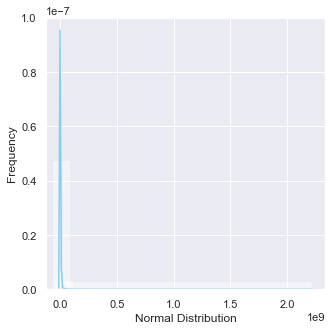

In [22]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth': 15, 'alpha':0.5})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

**Conclusion :**

berdasarkan plot di atas dapat diketahui bahwa distribusi miring ke kanan yang berarti distribusi dengan positive skewness yang berarti nilai mean lebih besar dari nilai median

# H. Confidence Intervals

**Question :** Tentukan Confidence Interval dari populasi proporsi pada total units apartemen di daerah Manhattan (borough=1)!

In [23]:
df[['BOROUGH','TOTAL UNITS']].groupby('BOROUGH').sum()

,TOTAL UNITS
BOROUGH,
1,48504
2,25403
3,53400
4,51841
5,11016


In [24]:
# proporsi total unit borough 1
n = 4850 + 25403 + 53400 + 51841 + 11016
p_b1 = 48504/n
p_b1

0.331062726093782

In [25]:
n

146510

In [26]:
se_b1 = np.sqrt(p_b1*(1-p_b1)/n)
se_b1

0.0012294594438593098

In [27]:
z_score = 1.96
lcb = p_b1 - z_score * se_b1   #lower
ucb = p_b1 + z_score * se_b1   #upper
lcb, ucb

(0.3286529855838178, 0.33347246660374624)

# I. Hypothesis Testing

**Question :** Apakah rata-rata harga rumah yang terjual pada wilayah Brooklyn dan Queens sama?

H0 : mu1 = mu2

H1 : mu1 =/ mu2

In [28]:
import statsmodels.api as sm

In [29]:
manhattan = df[df["BOROUGH"] == 1]
bronx = df[df["BOROUGH"] == 2]
brooklyn = df[df["BOROUGH"] == 3]
queens = df[df["BOROUGH"] == 4]
staten_island = df[df["BOROUGH"] == 5]

In [30]:
n1 = len(brooklyn)
mu1 = brooklyn["SALE PRICE"].mean()
sd1 = brooklyn["SALE PRICE"].std()

n1, mu1, sd1

(24047, 834488.3717719465, 3935813.428569773)

In [31]:
n2 = len(queens)
mu2 = queens["SALE PRICE"].mean()
sd2 = queens["SALE PRICE"].std()

n2, mu2, sd2

(26736, 739908.6159102, 3233883.5561785633)

In [32]:
sm.stats.ztest(brooklyn["SALE PRICE"].dropna(), queens["SALE PRICE"].dropna(), alternative='two-sided')

(2.6488563571165837, 0.0080764651142228)

**Conclusion**

karena nilai p-value = 0.008 lebih kecil dari alpha = 0.05, maka kita dapat menolak Null hipotesis yang berarti rata-rata harga apartemen yang terjual di Broklyn dan Queens berbeda.